# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")



#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
print(type(temp["City"]))
print(type(temp["State"]))
print(type(temp["Temperature"]))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Select the rows where state is New York

In [5]:

temp_copy = temp.loc[temp["State"] == "New York"]

#### What is the average of the temperature of cities in New York?

In [6]:
temp_copy["Temperature"].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp.loc[temp["Temperature"] > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp.loc[temp["Temperature"] < 15]

,City,State,Temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp.loc[temp["Temperature"].between(15,20)]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
6,Newark,New Jersey,20.000000


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
print(temp.groupby("State").mean())
print(temp.groupby("State").std())

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# print(type(employee["Name"]))
# print(type(employee["Years"]))
# print(type(employee["Salary"]))

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

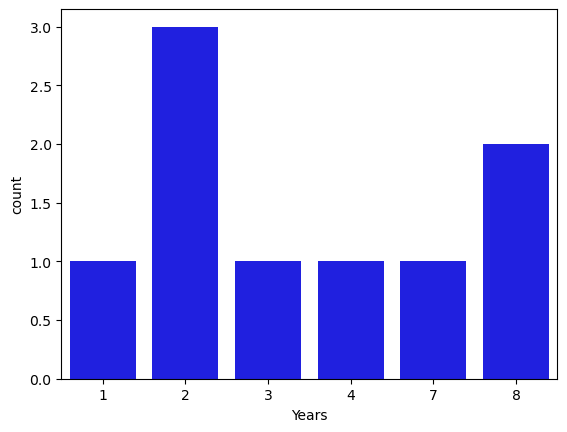

In [13]:
sns.countplot(x=employee["Years"], color='b');

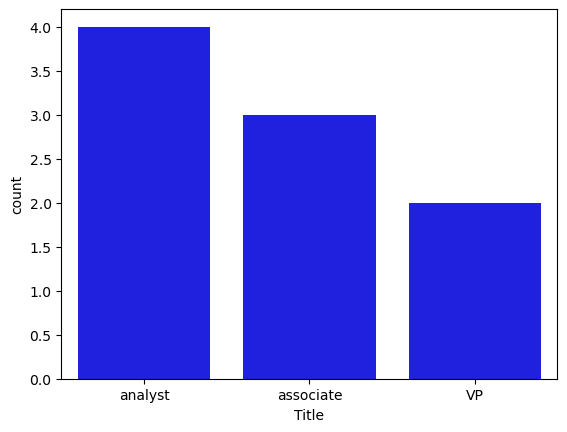

In [14]:
sns.countplot(x=employee["Title"], color='blue');

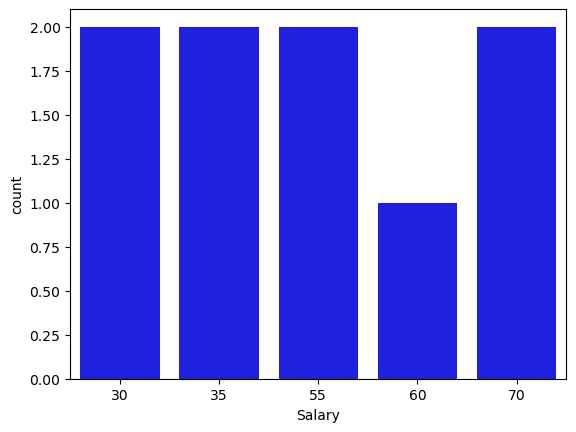

In [15]:
sns.countplot(x=employee["Salary"], color='blue');

#### What's the average salary in this company?

In [16]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [17]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [18]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [19]:

employee.sort_values(by=["Salary"]).head(4) 

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Could you give all the information about an employee called David?

In [20]:
employee.loc[employee['Name'] == "David"]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [21]:
employee["Salary"].loc[employee['Name'] == "David"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [22]:
employee.loc[employee['Title'] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
employee.head(2)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


In [24]:
employee[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
employee.loc[(employee['Title'] == "associate") & ~ (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [26]:
employee.groupby(["Years", "Name"]).mean()

Salary
Years Name          
1     Jose      35.0
2     David     30.0
      Eva       55.0
      Maria     30.0
3     Samuel    55.0
4     Sonia     35.0
7     Pedro     60.0
8     Ana       70.0
      Carlos    70.0

####  What is the average Salary per title?

In [27]:
employee.groupby(["Title"]).mean(["Salary"])

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [28]:
sns.boxplot(x=employee["Salary"], data=employee, y="Gender");

In [29]:
employee["Salary"].quantile(0.25)

In [30]:
employee["Salary"].quantile(0.75)

#### Is the mean salary per gender different?

In [31]:
employee.groupby(["Gender"]).mean(["Salary"])

# Female average salary is lower

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
print(employee.groupby(["Department"]).mean(["Salary", "Years"]))
print(employee.groupby(["Department"]).min(["Salary", "Years"]))
print(employee.groupby(["Department"]).max(["Salary", "Years"]))

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
employee.groupby(["Department"]).agg(["max", "min"])

In [ ]:
employee.groupby(["Department"]).apply(lambda x:(x["Salary"].max()-x["Salary"].min()))

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
orders = pd.read_csv("Orders.zip")
orders.drop(["Unnamed: 0"], axis = 1, inplace=True)
orders.head()

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# orders["InvoiceNo"].dtype
# orders["Description"].dtype
# orders["UnitPrice"].dtype
# orders["InvoiceDate"].dtype
# orders["amount_spent"].dtype

In [36]:
# your answer here

####  What is the average Purchase Price?

In [37]:
orders["amount_spent"].mean()

#### What were the highest and lowest purchase prices? 

In [38]:
orders["amount_spent"].max()

In [39]:
orders["amount_spent"].min()

#### Select all the customers we have in Spain

In [40]:
orders.loc[orders["Country"] == "Spain"].head()

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [41]:
len(orders.loc[orders["Country"] == "Spain"].value_counts())

#### Select all the customers who have bought more than 50 items ?

In [42]:
orders["CustomerID"].value_counts().loc[lambda x: x > 50].index

#### Select orders from Spain that are above 50 items

In [43]:
orders2 = orders.loc[orders["Country"] == "Spain"]
orders2.loc[orders["Quantity"] > 50].head()

#### Select all free orders

In [44]:
orders.loc[orders["amount_spent"] == 0].head()

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [45]:
orders.loc[orders["Description"].str.contains('lunch bag')].head()

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [46]:
orders.loc[(orders["Description"].str.contains('lunch bag') & (orders['year'] == 2011))]

#### Show the frequency distribution of the amount spent in Spain.

In [47]:
plot = plt.hist(orders2["amount_spent"], bins=120)

#### Select all orders made in the month of August

In [48]:
orders.loc[orders["month"] == 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [49]:
orders.loc[orders["month"] == 8].value_counts("Country").head()

#### What's the  average amount of money spent by country

In [50]:
orders.groupby("Country")["amount_spent"].mean().head()

#### What's the most expensive item?

In [51]:
orders[orders["UnitPrice"] == max(orders["UnitPrice"])]

#### What was the average amount spent per year ?

In [52]:
orders.groupby("month")["amount_spent"].mean()